<a href="https://colab.research.google.com/github/preritt/Embed/blob/master/(1)CNN_Affine_Valid99p78Test99p24_04272019_99p4ProbBased_LeNet_LabForRpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet Lab
![LeNet Architecture](https://github.com/sujaybabruwad/LeNet-in-Tensorflow/blob/master/lenet.png?raw=1)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [36]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


In [37]:
X_train.shape

(55000, 28, 28, 1)

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split


In [0]:
total_train_data = np.load('train_total_x.npy')
test_data = np.load('test_x.npy')

total_train_label = np.load('train_total_y.npy')
test_label = np.load('test_y.npy')

In [40]:
10000/600000

0.016666666666666666

In [0]:

# split train data and to create validation data
train_X,valid_X,train_ground,valid_ground = train_test_split(total_train_data,
                                                             total_train_label,
                                                             test_size=.1,
                                                             random_state=13)

In [0]:
train_X_reshaped =  np.reshape(train_X, newshape=(-1,28,28,1))
valid_X_reshaped =  np.reshape(valid_X, newshape=(-1,28,28,1))
test_X_reshaped =  np.reshape(test_data, newshape=(-1,28,28,1))


In [0]:
X_train = train_X_reshaped
X_validation = valid_X_reshaped
X_test = test_X_reshaped

In [0]:
y_train = train_ground
y_validation = valid_ground
y_test = test_label

In [0]:
# test_X_reshaped.shape

The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [46]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

6


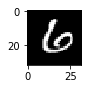

In [47]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [0]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [0]:
import tensorflow as tf

EPOCHS = 200
BATCH_SIZE = 512

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [0]:
connection_probability = tf.Variable(.9)

In [0]:
from tensorflow.contrib.layers import flatten

def LeNet(x, test_mode = False):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    layer_depth = {
        'layer_1' : 6,
        'layer_2' : 16,
        'layer_3' : 120,
        'layer_f1' : 84
    }

    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6],mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
    ##### Inset probability connection from x to conv2
    conv1p_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,16], mean = mu, stddev = sigma))
    conv1p_b = tf.Variable(tf.zeros(16))
    conv2_2nd_input = tf.nn.conv2d(x, conv1p_w, strides = [1,3,3,1], padding = 'VALID') + conv1p_b
    conv2_2nd_input = tf.nn.relu(conv2_2nd_input) #result = tf.cond(x < y, lambda: tf.add(x, z), lambda: tf.square(y))
#     conv2 = tf.cond(tf.random.uniform(shape = tf.shape(connection_probability)) < connection_probability,lambda: conv2 + conv2_2nd_input, lambda: conv2 )
    conv2 = tf.cond(tf.logical_and(tf.random.uniform(shape = tf.shape(connection_probability)) < connection_probability, tf.equal(test_mode,False)),lambda: conv2 + conv2_2nd_input, lambda: conv2 )

#     if (np.random.random_sample()<connection_probability and test_mode == False):
#         conv2 = conv2 + conv2_2nd_input
#     if test_mode == True:
#       conv2 = conv2 + conv2_2nd_input*connection_probability*0
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID') 
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(pool_2)
    fdense = fc1
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    
    #################
    ##### Inset probability connection from x to conv2
    fc2p_w = tf.Variable(tf.truncated_normal(shape = [400,84], mean = mu, stddev = sigma))
    fc2p_b = tf.Variable(tf.zeros(84))
    fc2_2nd_input = tf.matmul(fdense,fc2p_w) + fc2p_b
    fc2_2nd_input = tf.nn.relu(fc2_2nd_input)
    fc2 = tf.cond(tf.logical_and(tf.random.uniform(shape = tf.shape(connection_probability)) < connection_probability, tf.equal(test_mode,False)),lambda: fc2 + fc2_2nd_input, lambda: fc2 )

#     if (np.random.random_sample()<connection_probability and test_mode == False):
#         fc2 = fc2 + fc2_2nd_input
#     if test_mode == True:
#         fc2 = fc2 + fc2_2nd_input*connection_probability*0
    
    ################
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = mu , stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [0]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)
is_testing= tf.placeholder(tf.bool) 

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [53]:
rate = 0.001
decay_rate = 1.00002*(X_train.shape[0]/BATCH_SIZE)
decay_rate = 2

print(decay_rate)
logits = LeNet(x,is_testing)
with tf.name_scope('Train'):
  cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
  loss_operation = tf.reduce_mean(cross_entropy, name='loss')
  tf.summary.scalar('loss', loss_operation)
# optimizer = tf.train.MomentumOptimizer(learning_rate = rate,momentum=.9)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# tf.train.natural_exp_decay()
training_operation = optimizer.minimize(loss_operation)
new_prob = connection_probability.assign(connection_probability/decay_rate)



2


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, is_testing: True})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [0]:
import math

In [0]:
def augment(images, labels,
            resize=None, # (width, height) tuple or None
            horizontal_flip=False,
            vertical_flip=False,
            rotate=0, # Maximum rotation angle in degrees
            crop_probability=0, # How often we do crops
            crop_min_percent=0.6, # Minimum linear dimension of a crop
            crop_max_percent=1.,  # Maximum linear dimension of a crop
            mixup=0):  # Mixup coeffecient, see https://arxiv.org/abs/1710.09412.pdf
  if resize is not None:
    images = tf.image.resize_bilinear(images, resize)
  
  # My experiments showed that casting on GPU improves training performance
  if images.dtype != tf.float32:
    images = tf.image.convert_image_dtype(images, dtype=tf.float32)
    images = tf.subtract(images, 0.5)
    images = tf.multiply(images, 2.0)
  labels = tf.to_float(labels)

  with tf.name_scope('augmentation'):
    shp = tf.shape(images)
    batch_size, height, width = shp[0], shp[1], shp[2]
    width = tf.cast(width, tf.float32)
    height = tf.cast(height, tf.float32)

    # The list of affine transformations that our image will go under.
    # Every element is Nx8 tensor, where N is a batch size.
    transforms = []
    identity = tf.constant([1, 0, 0, 0, 1, 0, 0, 0], dtype=tf.float32)
    if horizontal_flip:
      coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), 0.5)
      flip_transform = tf.convert_to_tensor(
          [-1., 0., width, 0., 1., 0., 0., 0.], dtype=tf.float32)
      transforms.append(
          tf.where(coin,
                   tf.tile(tf.expand_dims(flip_transform, 0), [batch_size, 1]),
                   tf.tile(tf.expand_dims(identity, 0), [batch_size, 1])))

    if vertical_flip:
      coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), 0.5)
      flip_transform = tf.convert_to_tensor(
          [1, 0, 0, 0, -1, height, 0, 0], dtype=tf.float32)
      transforms.append(
          tf.where(coin,
                   tf.tile(tf.expand_dims(flip_transform, 0), [batch_size, 1]),
                   tf.tile(tf.expand_dims(identity, 0), [batch_size, 1])))

    if rotate > 0:
      angle_rad = rotate / 180 * math.pi
      angles = tf.random_uniform([batch_size], -angle_rad, angle_rad)
      transforms.append(
          tf.contrib.image.angles_to_projective_transforms(
              angles, height, width))

    if crop_probability > 0:
      crop_pct = tf.random_uniform([batch_size], crop_min_percent,
                                   crop_max_percent)
      left = tf.random_uniform([batch_size], 0, width * (1 - crop_pct))
      top = tf.random_uniform([batch_size], 0, height * (1 - crop_pct))
      crop_transform = tf.stack([
          crop_pct,
          tf.zeros([batch_size]), top,
          tf.zeros([batch_size]), crop_pct, left,
          tf.zeros([batch_size]),
          tf.zeros([batch_size])
      ], 1)

      coin = tf.less(
          tf.random_uniform([batch_size], 0, 1.0), crop_probability)
      transforms.append(
          tf.where(coin, crop_transform,
                   tf.tile(tf.expand_dims(identity, 0), [batch_size, 1])))

    if transforms:
      images = tf.contrib.image.transform(
          images,
          tf.contrib.image.compose_transforms(*transforms),
          interpolation='BILINEAR') # or 'NEAREST'

    def cshift(values): # Circular shift in batch dimension
      return tf.concat([values[-1:, ...], values[:-1, ...]], 0)

    if mixup > 0:
      mixup = 1.0 * mixup # Convert to float, as tf.distributions.Beta requires floats.
      beta = tf.distributions.Beta(mixup, mixup)
      lam = beta.sample(batch_size)
      ll = tf.expand_dims(tf.expand_dims(tf.expand_dims(lam, -1), -1), -1)
      images = ll * images + (1 - ll) * cshift(images)
      labels = lam * labels + (1 - lam) * cshift(labels)

  return images, labels

In [0]:
def augment_data(dataset, dataset_labels, augementation_factor=1, use_random_rotation=True, use_random_shear=True, use_random_shift=True, use_random_zoom=True):
	augmented_image = []
	augmented_image_labels = []

	for num in range (0, dataset.shape[0]):

		for i in range(0, augementation_factor):
			# original image:
			augmented_image.append(dataset[num])
			augmented_image_labels.append(dataset_labels[num])

			if use_random_rotation:
				augmented_image.append(tf.contrib.keras.preprocessing.image.random_rotation(dataset[num], 20, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_shear:
				augmented_image.append(tf.contrib.keras.preprocessing.image.random_shear(dataset[num], 0.2, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_shift:
				augmented_image.append(tf.contrib.keras.preprocessing.image.random_shift(dataset[num], 0.2, 0.2, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

# 			if use_random_zoom:
# 				augmented_image.append(tf.contrib.keras.preprocessing.image.random_zoom(dataset[num], 0.9, row_axis=0, col_axis=1, channel_axis=2))
# 				augmented_image_labels.append(dataset_labels[num])

	return np.array(augmented_image), np.array(augmented_image_labels)

In [58]:
(X_train.shape)

(540000, 32, 32, 1)

In [0]:
# # These can be any tensors of matching type and dimensions.
# images = tf.placeholder(tf.uint8, shape=(None, None, None, 3))
# labels = tf.placeholder(tf.uint64, shape=(None))

# images, labels = augment(tf.convert_to_tensor(X_train), tf.convert_to_tensor(y_train),
#                          horizontal_flip=True, rotate=15, crop_probability=0.8, mixup=4)


In [0]:
images, labels = (X_train, y_train)

In [60]:
images.shape

(540000, 32, 32, 1)

In [0]:
EPOCHS = 100

In [0]:
import os
logs_path = "./logs/embedding/"  # path to the folder that we want to save the logs for Tensorboard

In [0]:
merged = tf.summary.merge_all()

In [0]:
BATCH_SIZE = 512

In [0]:
EPOCHS = 100

In [0]:
# total_steps_for_one_pass

In [67]:
validation_accuracy_track = []
train_accuracy_track = []
connection_probability_track = []
print_every = 1
number_of_ex = X_train.shape[0]
total_steps_for_one_pass = number_of_ex//BATCH_SIZE + 1

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    best_accuracy_valid = 0
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        X_train, y_train = shuffle(images, labels)

        for offset in range(0, num_examples, BATCH_SIZE):
          end = offset + BATCH_SIZE
          batch_x, batch_y = X_train[offset:end], y_train[offset:end]
          
#         for step in range(0, total_steps_for_one_pass):  
# #           print(step)
#           if step>=number_of_ex//BATCH_SIZE:
#             batch_x, batch_y = X_train[step*BATCH_SIZE:,:,:,:],y_train[step*BATCH_SIZE:]
# #             print(step,'Finishing',step*BATCH_SIZE )
#             step = 0

#           else:

#             start = step*BATCH_SIZE
#             finish = (step+1)*BATCH_SIZE
# #             print(step,'Doing', 'Start = ', start, "Finish = ", finish)
#             batch_x, batch_y = X_train[step:finish,:,:,:],y_train[step:finish]
  
          tr_op = sess.run([training_operation], feed_dict={x: batch_x, y: batch_y, is_testing : False})
#         print(i)  
        if i%print_every == 0:
          prob = sess.run(new_prob)
          print(prob)
          validation_accuracy = evaluate(X_validation, y_validation)
          validation_accuracy_track.append(validation_accuracy)
          tr_accuracy = evaluate(X_train, y_train)
          print("Train Accuracy = {:.5f}".format(tr_accuracy))
          train_accuracy_track.append(tr_accuracy)
          connection_probability_track.append(prob)
          print("EPOCH {} ...".format(i+1))
          print("Validation Accuracy = {:.5f}".format(validation_accuracy))
          print()
          if (validation_accuracy >= best_accuracy_valid):
            best_accuracy_valid = validation_accuracy
            saver.save(sess, './lenet5')
        
#     saver.save(sess, './lenet')
    print("Model saved")

Training...

0.45
Train Accuracy = 0.93708
EPOCH 1 ...
Validation Accuracy = 0.93677

0.225
Train Accuracy = 0.97996
EPOCH 2 ...
Validation Accuracy = 0.97908

0.1125
Train Accuracy = 0.98826
EPOCH 3 ...
Validation Accuracy = 0.98722

0.05625
Train Accuracy = 0.98852
EPOCH 4 ...
Validation Accuracy = 0.98685

0.028125
Train Accuracy = 0.99041
EPOCH 5 ...
Validation Accuracy = 0.98877

0.0140625
Train Accuracy = 0.99329
EPOCH 6 ...
Validation Accuracy = 0.99097

0.00703125
Train Accuracy = 0.99416
EPOCH 7 ...
Validation Accuracy = 0.99258

0.003515625
Train Accuracy = 0.99484
EPOCH 8 ...
Validation Accuracy = 0.99297

0.0017578125
Train Accuracy = 0.99540
EPOCH 9 ...
Validation Accuracy = 0.99340

0.0008789062
Train Accuracy = 0.99607
EPOCH 10 ...
Validation Accuracy = 0.99438

0.0004394531
Train Accuracy = 0.99719
EPOCH 11 ...
Validation Accuracy = 0.99528

0.00021972656
Train Accuracy = 0.99692
EPOCH 12 ...
Validation Accuracy = 0.99503

0.00010986328
Train Accuracy = 0.99676
EPOCH 13

In [68]:
best_accuracy_valid

0.9978333333333333

In [0]:
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     num_examples = len(X_train)
#     best_accuracy_valid = 0
    
#     print("Training...")
#     print()
#     for i in range(EPOCHS):
#         X_train, y_train = shuffle(images, labels)
#         for offset in range(0, num_examples, BATCH_SIZE):
#             end = offset + BATCH_SIZE
#             batch_x, batch_y = X_train[offset:end], y_train[offset:end]
#             tr_op = sess.run([training_operation], feed_dict={x: batch_x, y: batch_y, is_testing : False})
#             
#             prob = sess.run(new_prob)
#         print(prob)
#         validation_accuracy = evaluate(X_validation, y_validation)
#         print("EPOCH {} ...".format(i+1))
#         print("Validation Accuracy = {:.3f}".format(validation_accuracy))
#         print()
#         if (validation_accuracy >= best_accuracy_valid):
#           best_accuracy_valid = validation_accuracy
#           saver.save(sess, './lenet')
        
# #     saver.save(sess, './lenet')
#     print("Model saved")

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [69]:
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet5')
    test_accuracy = evaluate(X_validation, y_validation)
    print("Validation Accuracy = {:.5f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet5
Validation Accuracy = 0.99783


In [70]:
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet5')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.5f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet5
Test Accuracy = 0.99240


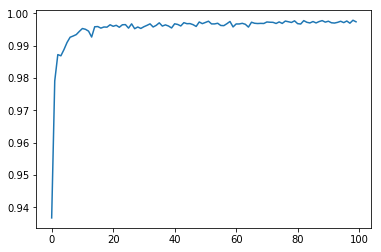

In [76]:
plt.plot(validation_accuracy_track)

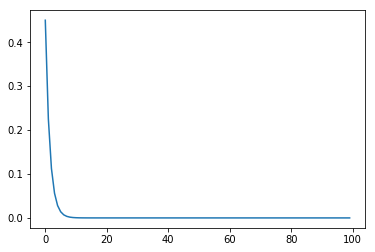

In [77]:
plt.plot(connection_probability_track)

In [72]:
(1-test_accuracy)*100

0.7600000286102304

In [0]:
import scipy.io as sio


In [0]:
epochTrack = [k for k in range(1,110,10)]



In [0]:
sio.savemat('LeNEt5PRobBasedValid99p78Test99p24.mat', {'ValidationTracked':validation_accuracy_track,
                                       'train_accuracy_track':train_accuracy_track,
                                       'connection_probability_track':connection_probability_track,
                                       'epochTrack':epochTrack, 'TestAcc':test_accuracy,
                                                         'BestValidation':best_accuracy_valid})

In [0]:
def write_sprite_image(filename, images):
    """
        Create a sprite image consisting of sample images
        :param filename: name of the file to save on disk
        :param shape: tensor of flattened images
    """

    # Invert grayscale image
    images = 1 - images

    # Calculate number of plot
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))

    # Make the background of sprite image
    sprite_image = np.ones((img_h * n_plots, img_w * n_plots))

    for i in range(n_plots):
        for j in range(n_plots):
            img_idx = i * n_plots + j
            if img_idx < images.shape[0]:
                img = images[img_idx]
                sprite_image[i * img_h:(i + 1) * img_h,
                j * img_w:(j + 1) * img_w] = img

    plt.imsave(filename, sprite_image, cmap='gray')
    print('Sprite image saved in {}'.format(filename))

def write_metadata(filename, labels):
    """
            Create a metadata file image consisting of sample indices and labels
            :param filename: name of the file to save on disk
            :param shape: tensor of labels
    """
    with open(filename, 'w') as f:
        f.write("Index\tLabel\n")
        for index, label in enumerate(labels):
            f.write("{}\t{}\n".format(index, label))

    print('Metadata file saved in {}'.format(filename))
 

In [0]:
img_w = 32
img_h = 32

In [0]:
# Reshape images from vector to matrix
x_test_images = np.reshape(np.array(X_test), (-1, img_w, img_h))
# Reshape labels from one-hot-encode to index
x_test_labels = y_test

write_sprite_image(os.path.join(logs_path, 'sprite_images.png'), x_test_images)
write_metadata(os.path.join(logs_path, 'metadata.tsv'), x_test_labels)

NameError: ignored

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip
# logdir=logs/embedding/
LOG_DIR = 'logs/embedding/'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
ngrok_url = !curl -s http://localhost:4040/api/tunnels | python -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
        
ngrok_url = ngrok_url[0].replace("'", '')
print(ngrok_url)

In [0]:
from IPython.display import IFrame

IFrame(ngrok_url, width=700, height=900)